In [95]:
import pandas as pd

In [96]:
df = pd.read_csv('answer20.txt')

In [97]:
df = df.drop('Unnamed: 18', axis=1)

In [98]:
df.columns

Index(['Направление', 'Время_в_пути', 'Авиакомпания', 'Номер_рейса',
       'Аэропорт_отправления', 'Аэропорт_прибытия', 'Время_отправления',
       'Время_прибытия', 'Дата_отправления', 'Дата_прибытия',
       'День_недели_отправления', 'День_недели_прибытия', 'Самолет',
       'Ручная_кладь', 'Багаж', 'Обмен', 'Возврат', 'Цена'],
      dtype='object')

In [99]:
df['Цена'] = pd.to_numeric(df['Цена'])

In [100]:
luggage = {}
for p in df['Багаж'].unique():
    info = p.split(' ')
    if info[1].isdigit():
        luggage[p] = int(info[1])
    if '×' in info[1]:
        luggage[p] = int(info[1][-2:])*2    
    else:
        luggage[p] = 0

In [101]:
df['Багаж'] = df['Багаж'].apply(lambda x: luggage[x])

In [102]:
hand_luggage = {}
for p in df['Ручная_кладь'].unique():
    info = p.split(' ')
    if info[2].isdigit():
        hand_luggage[p] = int(info[2])   
    else:
        hand_luggage[p] = 0

In [103]:
df['Ручная_кладь'] = df['Ручная_кладь'].apply(lambda x: hand_luggage[x])

In [104]:
return_tickets = {'Без возврата' : 0, 'Возврат со сбором': 1}
df['Возврат'] = df['Возврат'].apply(lambda x: return_tickets[x])

In [105]:
exchange = {'Без обмена': 0,'Обмен со сбором': 1}
df['Обмен'] = df['Обмен'].apply(lambda x: exchange[x])

In [106]:
День_отправления = df['Дата_отправления'].str.split(' ', expand=True)[0]
Месяц_отправления = df['Дата_отправления'].str.split(' ', expand=True)[1]
df.insert(8, 'Месяц_отправления' ,Месяц_отправления)
df.insert(8, 'День_отправления', День_отправления)
months = {'июня': 'Jun', 'июля': 'Jul', 'августа': 'Aug'}
df['Месяц_отправления'] = df['Месяц_отправления'].apply(lambda x: months[x])
df['Дата_отправления'] = df['День_отправления'] + " " + df['Месяц_отправления']
df = df.drop(columns=['Месяц_отправления', 'День_отправления'], axis = 1)
day_of_week = {'пн': 1, 'вт': 2, 'ср': 3, 'чт': 4, 'пт': 5, 'сб': 6, 'вс': 7}
df['День_недели_отправления'] = df['День_недели_отправления'].apply(lambda x: day_of_week[x])


In [107]:
День_прибытия = df['Дата_прибытия'].str.split(' ', expand=True)[0]
Месяц_прибытия = df['Дата_прибытия'].str.split(' ', expand=True)[1]
df.insert(9, 'Месяц_прибытия' ,Месяц_прибытия)
df.insert(9, 'День_прибытия', День_прибытия)
months = {'июня': 'Jun', 'июля': 'Jul', 'августа': 'Aug'}
df['Месяц_прибытия'] = df['Месяц_прибытия'].apply(lambda x: months[x])
df['Дата_прибытия'] = df['День_прибытия'] + " " + df['Месяц_прибытия']
df = df.drop(columns=['Месяц_прибытия', 'День_прибытия'], axis = 1)
df['День_недели_прибытия'] = df['День_недели_прибытия'].apply(lambda x: day_of_week[x])

In [108]:
def time_in_air_to_minutes(time_str: str):
    words = time_str.split(' ')
    if 'ч' in words:
        hours = words[0]
        minutes = words[2]
        if minutes.isdigit():
            return int(hours) * 60 + int(minutes)
        else:
            return int(hours) * 60
    else:
        minutes = words[0]
        return int(minutes)

In [109]:
import numpy as np

df['Время_в_пути'] = df['Время_в_пути'].apply(time_in_air_to_minutes)

In [110]:
df['Время_отправления'] = df['Время_отправления'] + " " + df['Дата_отправления']


In [111]:
df['Время_прибытия'] = df['Время_прибытия'] + " " + df['Дата_прибытия']

In [112]:
df.head(5)

,Направление,Время_в_пути,Авиакомпания,Номер_рейса,Аэропорт_отправления,Аэропорт_прибытия,Время_отправления,Время_прибытия,Дата_отправления,Дата_прибытия,День_недели_отправления,День_недели_прибытия,Самолет,Ручная_кладь,Багаж,Обмен,Возврат,Цена
0,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,10:30 3 Jun,12:05 3 Jun,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,0,13347
1,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,10:30 3 Jun,12:05 3 Jun,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,1,15979
2,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,10:30 3 Jun,12:05 3 Jun,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,1,32389
3,Москва - Санкт-Петербург,85,Россия,SU-6515,SVO,LED,16:30 3 Jun,17:55 3 Jun,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,8221
4,Москва - Санкт-Петербург,85,Россия,SU-6010,VKO,LED,13:30 3 Jun,14:55 3 Jun,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,8076


In [113]:
from datetime import datetime


def time_to_correct_type(time: str):
    time = time + ' 2024'
    date = datetime.strptime(time,'%H:%M %d %b %Y')
    return date

df['Время_отправления'] = df['Время_отправления'].apply(time_to_correct_type)
df['Время_прибытия'] = df['Время_прибытия'].apply(time_to_correct_type)

In [114]:
df.head(30)

,Направление,Время_в_пути,Авиакомпания,Номер_рейса,Аэропорт_отправления,Аэропорт_прибытия,Время_отправления,Время_прибытия,Дата_отправления,Дата_прибытия,День_недели_отправления,День_недели_прибытия,Самолет,Ручная_кладь,Багаж,Обмен,Возврат,Цена
0,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,2024-06-03 10:30:00,2024-06-03 12:05:00,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,0,13347
1,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,2024-06-03 10:30:00,2024-06-03 12:05:00,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,1,15979
2,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,2024-06-03 10:30:00,2024-06-03 12:05:00,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,1,32389
3,Москва - Санкт-Петербург,85,Россия,SU-6515,SVO,LED,2024-06-03 16:30:00,2024-06-03 17:55:00,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,8221
4,Москва - Санкт-Петербург,85,Россия,SU-6010,VKO,LED,2024-06-03 13:30:00,2024-06-03 14:55:00,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,8076
5,Москва - Санкт-Петербург,85,Россия,SU-6495,SVO,LED,2024-06-03 15:30:00,2024-06-03 16:55:00,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,7053
6,Москва - Санкт-Петербург,85,Россия,SU-6481,SVO,LED,2024-06-03 15:00:00,2024-06-03 16:25:00,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,7053
7,Москва - Санкт-Петербург,85,Россия,SU-6190,VKO,LED,2024-06-03 06:30:00,2024-06-03 07:55:00,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,6908
8,Москва - Санкт-Петербург,95,S7 Airlines,S7-1007,DME,LED,2024-06-03 18:10:00,2024-06-03 19:45:00,3 Jun,3 Jun,1,1,Airbus A321,10,0,1,0,6467
9,Москва - Санкт-Петербург,95,S7 Airlines,S7-1007,DME,LED,2024-06-03 18:10:00,2024-06-03 19:45:00,3 Jun,3 Jun,1,1,Airbus A321,10,0,1,1,8493


In [115]:
df.drop_duplicates(inplace=True)

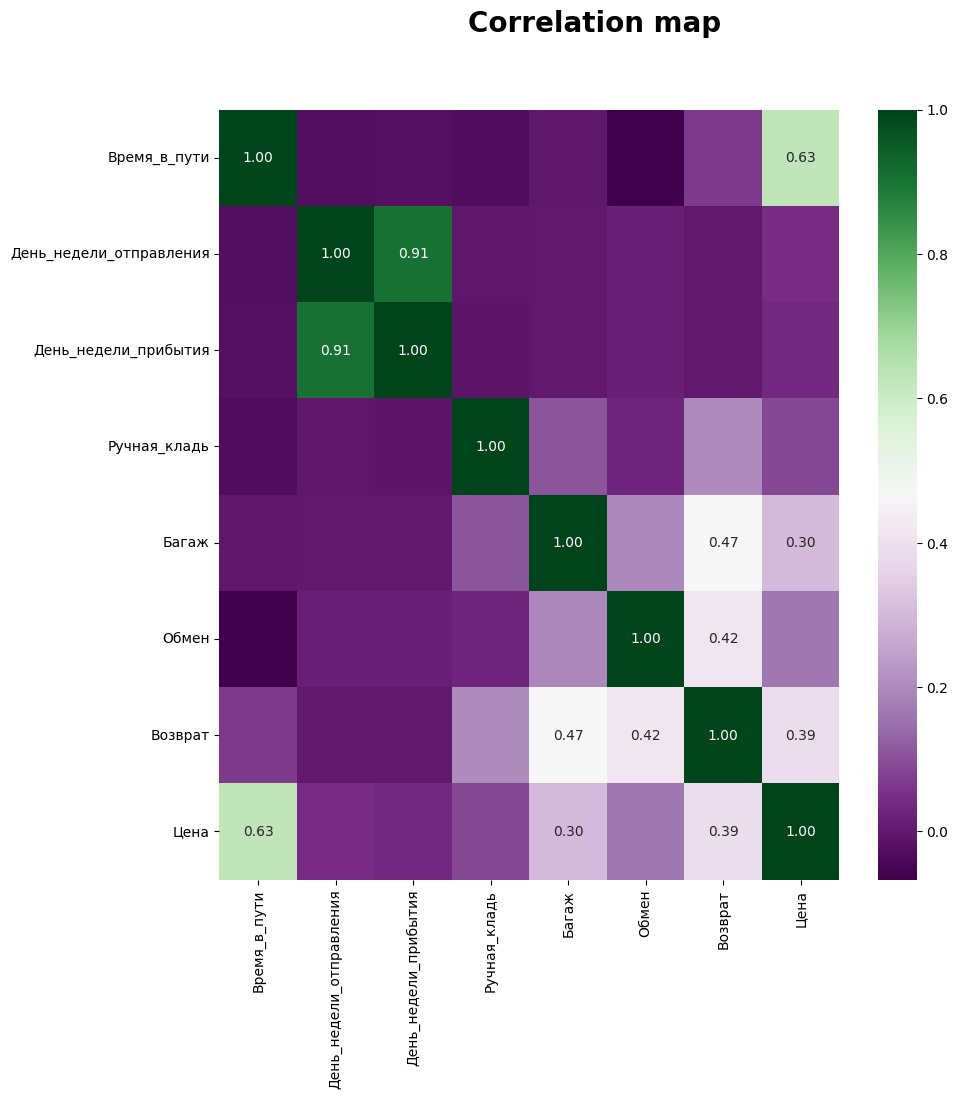

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax_heatmap = plt.subplots(1, 1, figsize=(10, 10))

fig.suptitle('Correlation map', fontsize = 20, weight = 'bold')

ax_heatmap = sns.heatmap(df.corr(numeric_only=True), cmap = 'PRGn', annot=True, fmt="0.2f", ax=ax_heatmap)
for t in ax_heatmap.texts:
    if float(t.get_text()) >= 0.25 or float(t.get_text()) <= -0.25:
        t.set_text(t.get_text())
    else:
        t.set_text("")

plt.show()

/var/folders/xp/hfqkwdyd7cl_l63v11g_d6680000gn/T/ipykernel_25091/1970949944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(data = df, x='Авиакомпания', y='Цена', palette='Pastel1')
/Users/polzovatel/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/polzovatel/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/polzovatel/Library/Python/3.9/lib/python/site-packages/seaborn/_b

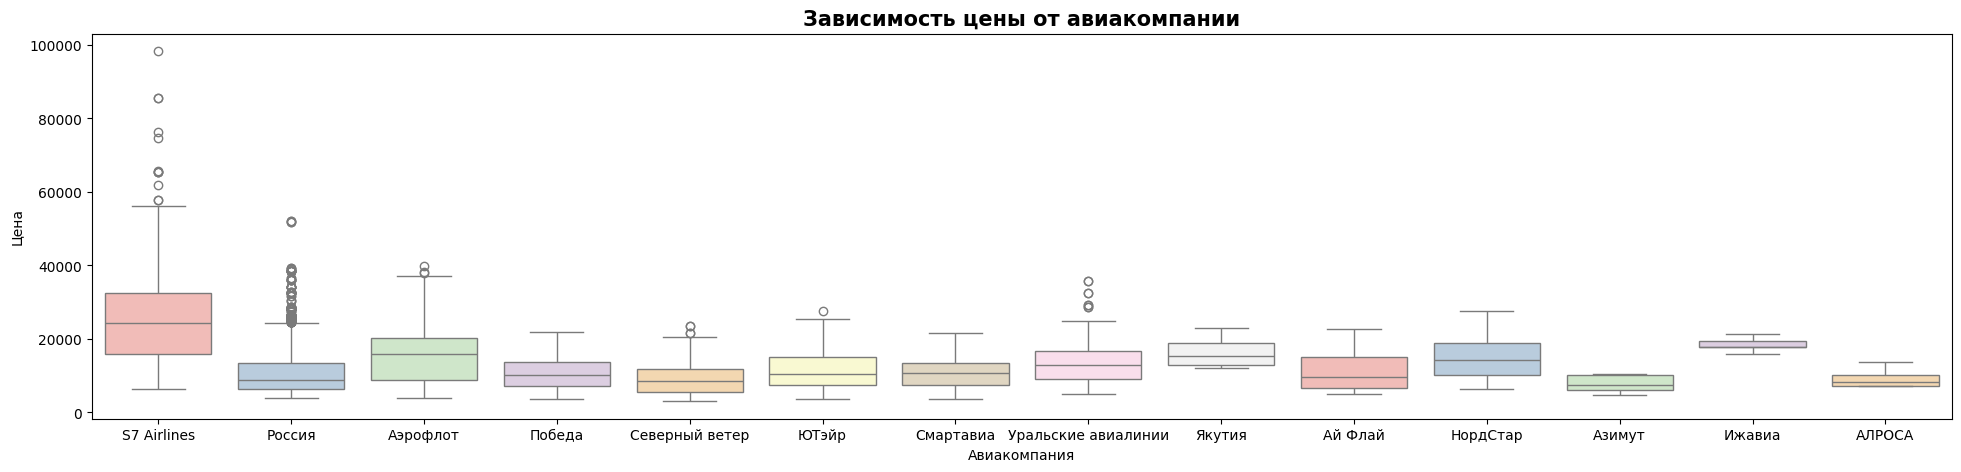

In [117]:
fig, ax3 = plt.subplots(1, 1, figsize=(24, 5))
ax3 = sns.boxplot(data = df, x='Авиакомпания', y='Цена', palette='Pastel1')

ax3.set_ylabel('Цена')
plt.title('Зависимость цены от авиакомпании', weight='bold', fontsize = 15)
plt.show()

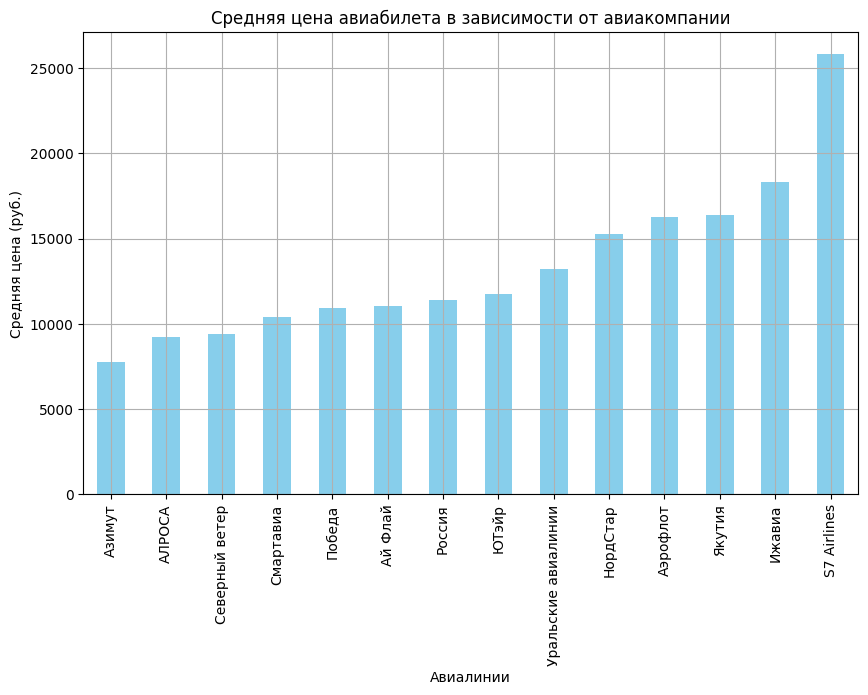

In [118]:
airline_price_avg = df.groupby('Авиакомпания')['Цена'].mean().sort_values()


plt.figure(figsize=(10, 6))
airline_price_avg.plot(kind='bar', color='skyblue')
plt.title('Средняя цена авиабилета в зависимости от авиакомпании')
plt.xlabel('Авиалинии')
plt.ylabel('Средняя цена (руб.)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


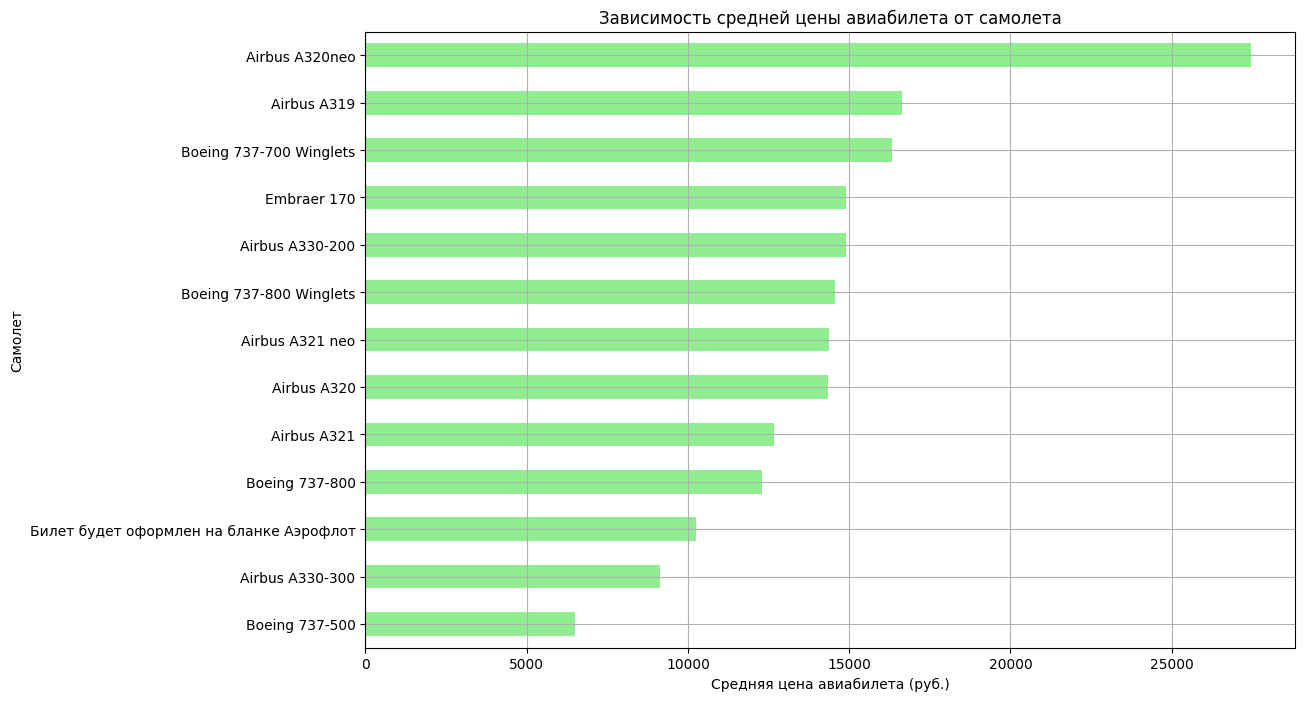

In [119]:

aircraft_price_avg = df.groupby('Самолет')['Цена'].mean().sort_values()


plt.figure(figsize=(12, 8))
aircraft_price_avg.plot(kind='barh', color='lightgreen')
plt.title('Зависимость средней цены авиабилета от самолета')
plt.xlabel('Средняя цена авиабилета (руб.)')
plt.ylabel('Самолет')
plt.grid(True)
plt.show()


In [120]:
df.to_csv('to_release2.csv')


/Users/polzovatel/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


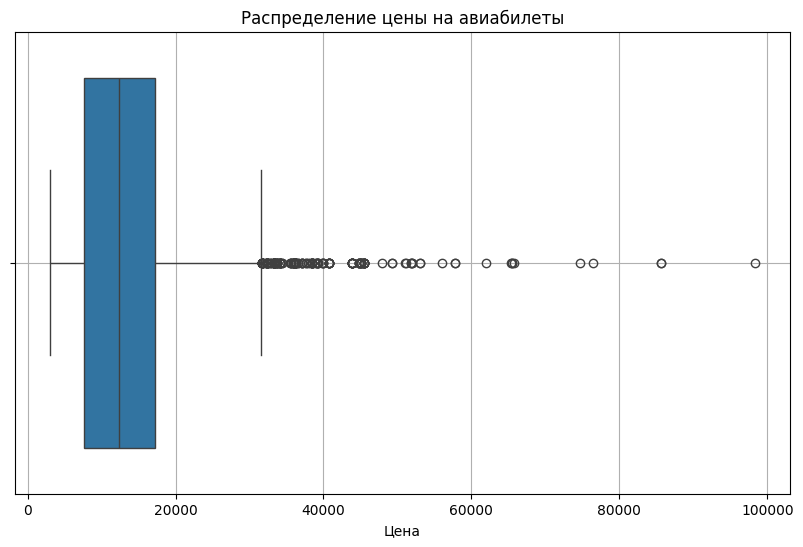

count     5595.000000
mean     13636.387846
std       8074.876450
min       3044.000000
25%       7689.000000
50%      12310.000000
75%      17264.000000
max      98292.000000
Name: Цена, dtype: float64

In [121]:
price_description = df['Цена'].describe()


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Цена'])
plt.title('Распределение цены на авиабилеты')
plt.xlabel('Цена')
plt.grid(True)
plt.show()

price_description

In [122]:
df['Цена за минуту'] = df['Цена'] / df['Время_в_пути']

In [123]:
df.head()

,Направление,Время_в_пути,Авиакомпания,Номер_рейса,Аэропорт_отправления,Аэропорт_прибытия,Время_отправления,Время_прибытия,Дата_отправления,Дата_прибытия,День_недели_отправления,День_недели_прибытия,Самолет,Ручная_кладь,Багаж,Обмен,Возврат,Цена,Цена за минуту
0,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,2024-06-03 10:30:00,2024-06-03 12:05:00,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,0,13347,140.494737
1,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,2024-06-03 10:30:00,2024-06-03 12:05:00,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,1,15979,168.200000
2,Москва - Санкт-Петербург,95,S7 Airlines,S7-1003,DME,LED,2024-06-03 10:30:00,2024-06-03 12:05:00,3 Jun,3 Jun,1,1,Airbus A319,10,0,1,1,32389,340.936842
3,Москва - Санкт-Петербург,85,Россия,SU-6515,SVO,LED,2024-06-03 16:30:00,2024-06-03 17:55:00,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,8221,96.717647
4,Москва - Санкт-Петербург,85,Россия,SU-6010,VKO,LED,2024-06-03 13:30:00,2024-06-03 14:55:00,3 Jun,3 Jun,1,1,Билет будет оформлен на бланке Аэрофлот,10,0,1,0,8076,95.011765


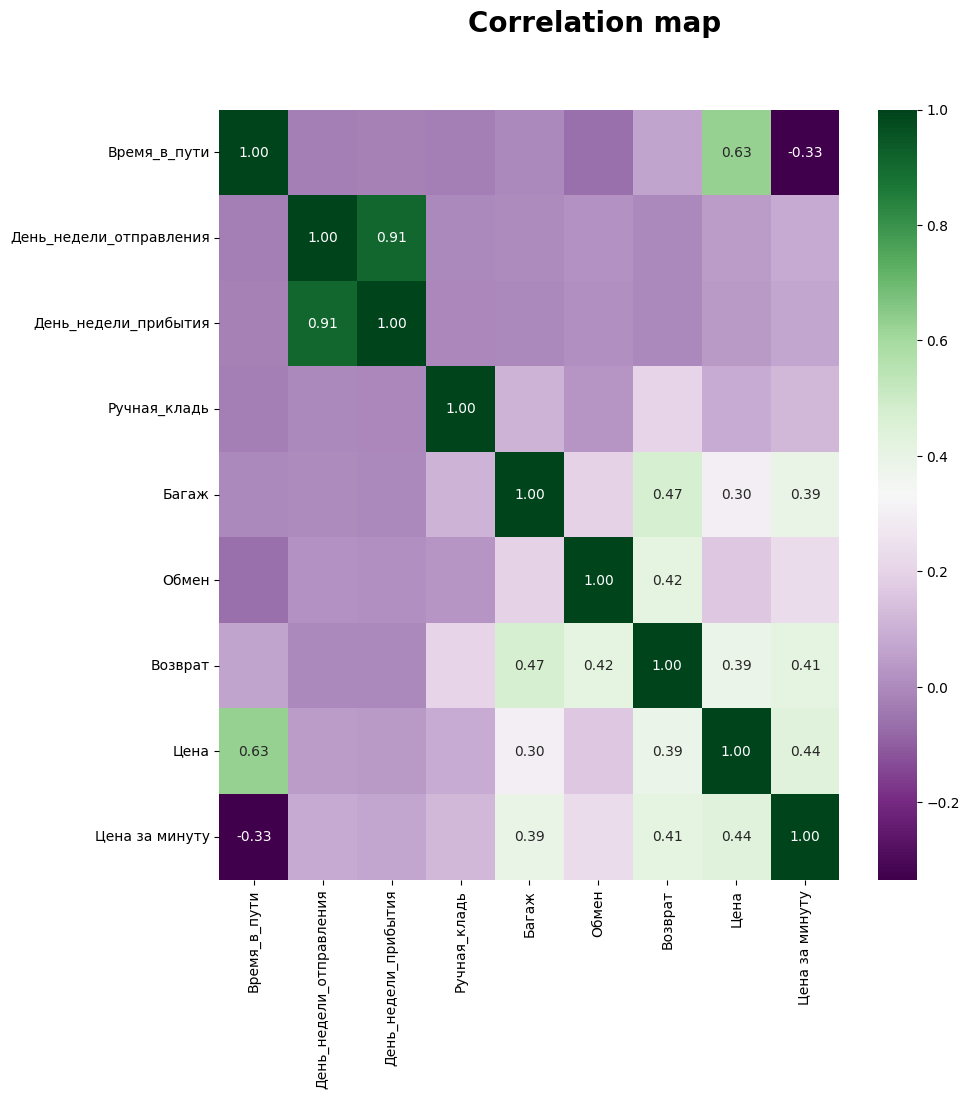

In [124]:
fig, ax_heatmap = plt.subplots(1, 1, figsize=(10, 10))

fig.suptitle('Correlation map', fontsize = 20, weight = 'bold')

ax_heatmap = sns.heatmap(df.corr(numeric_only=True), cmap = 'PRGn', annot=True, fmt="0.2f", ax=ax_heatmap)
for t in ax_heatmap.texts:
    if float(t.get_text()) >= 0.25 or float(t.get_text()) <= -0.25:
        t.set_text(t.get_text())
    else:
        t.set_text("")

plt.show()

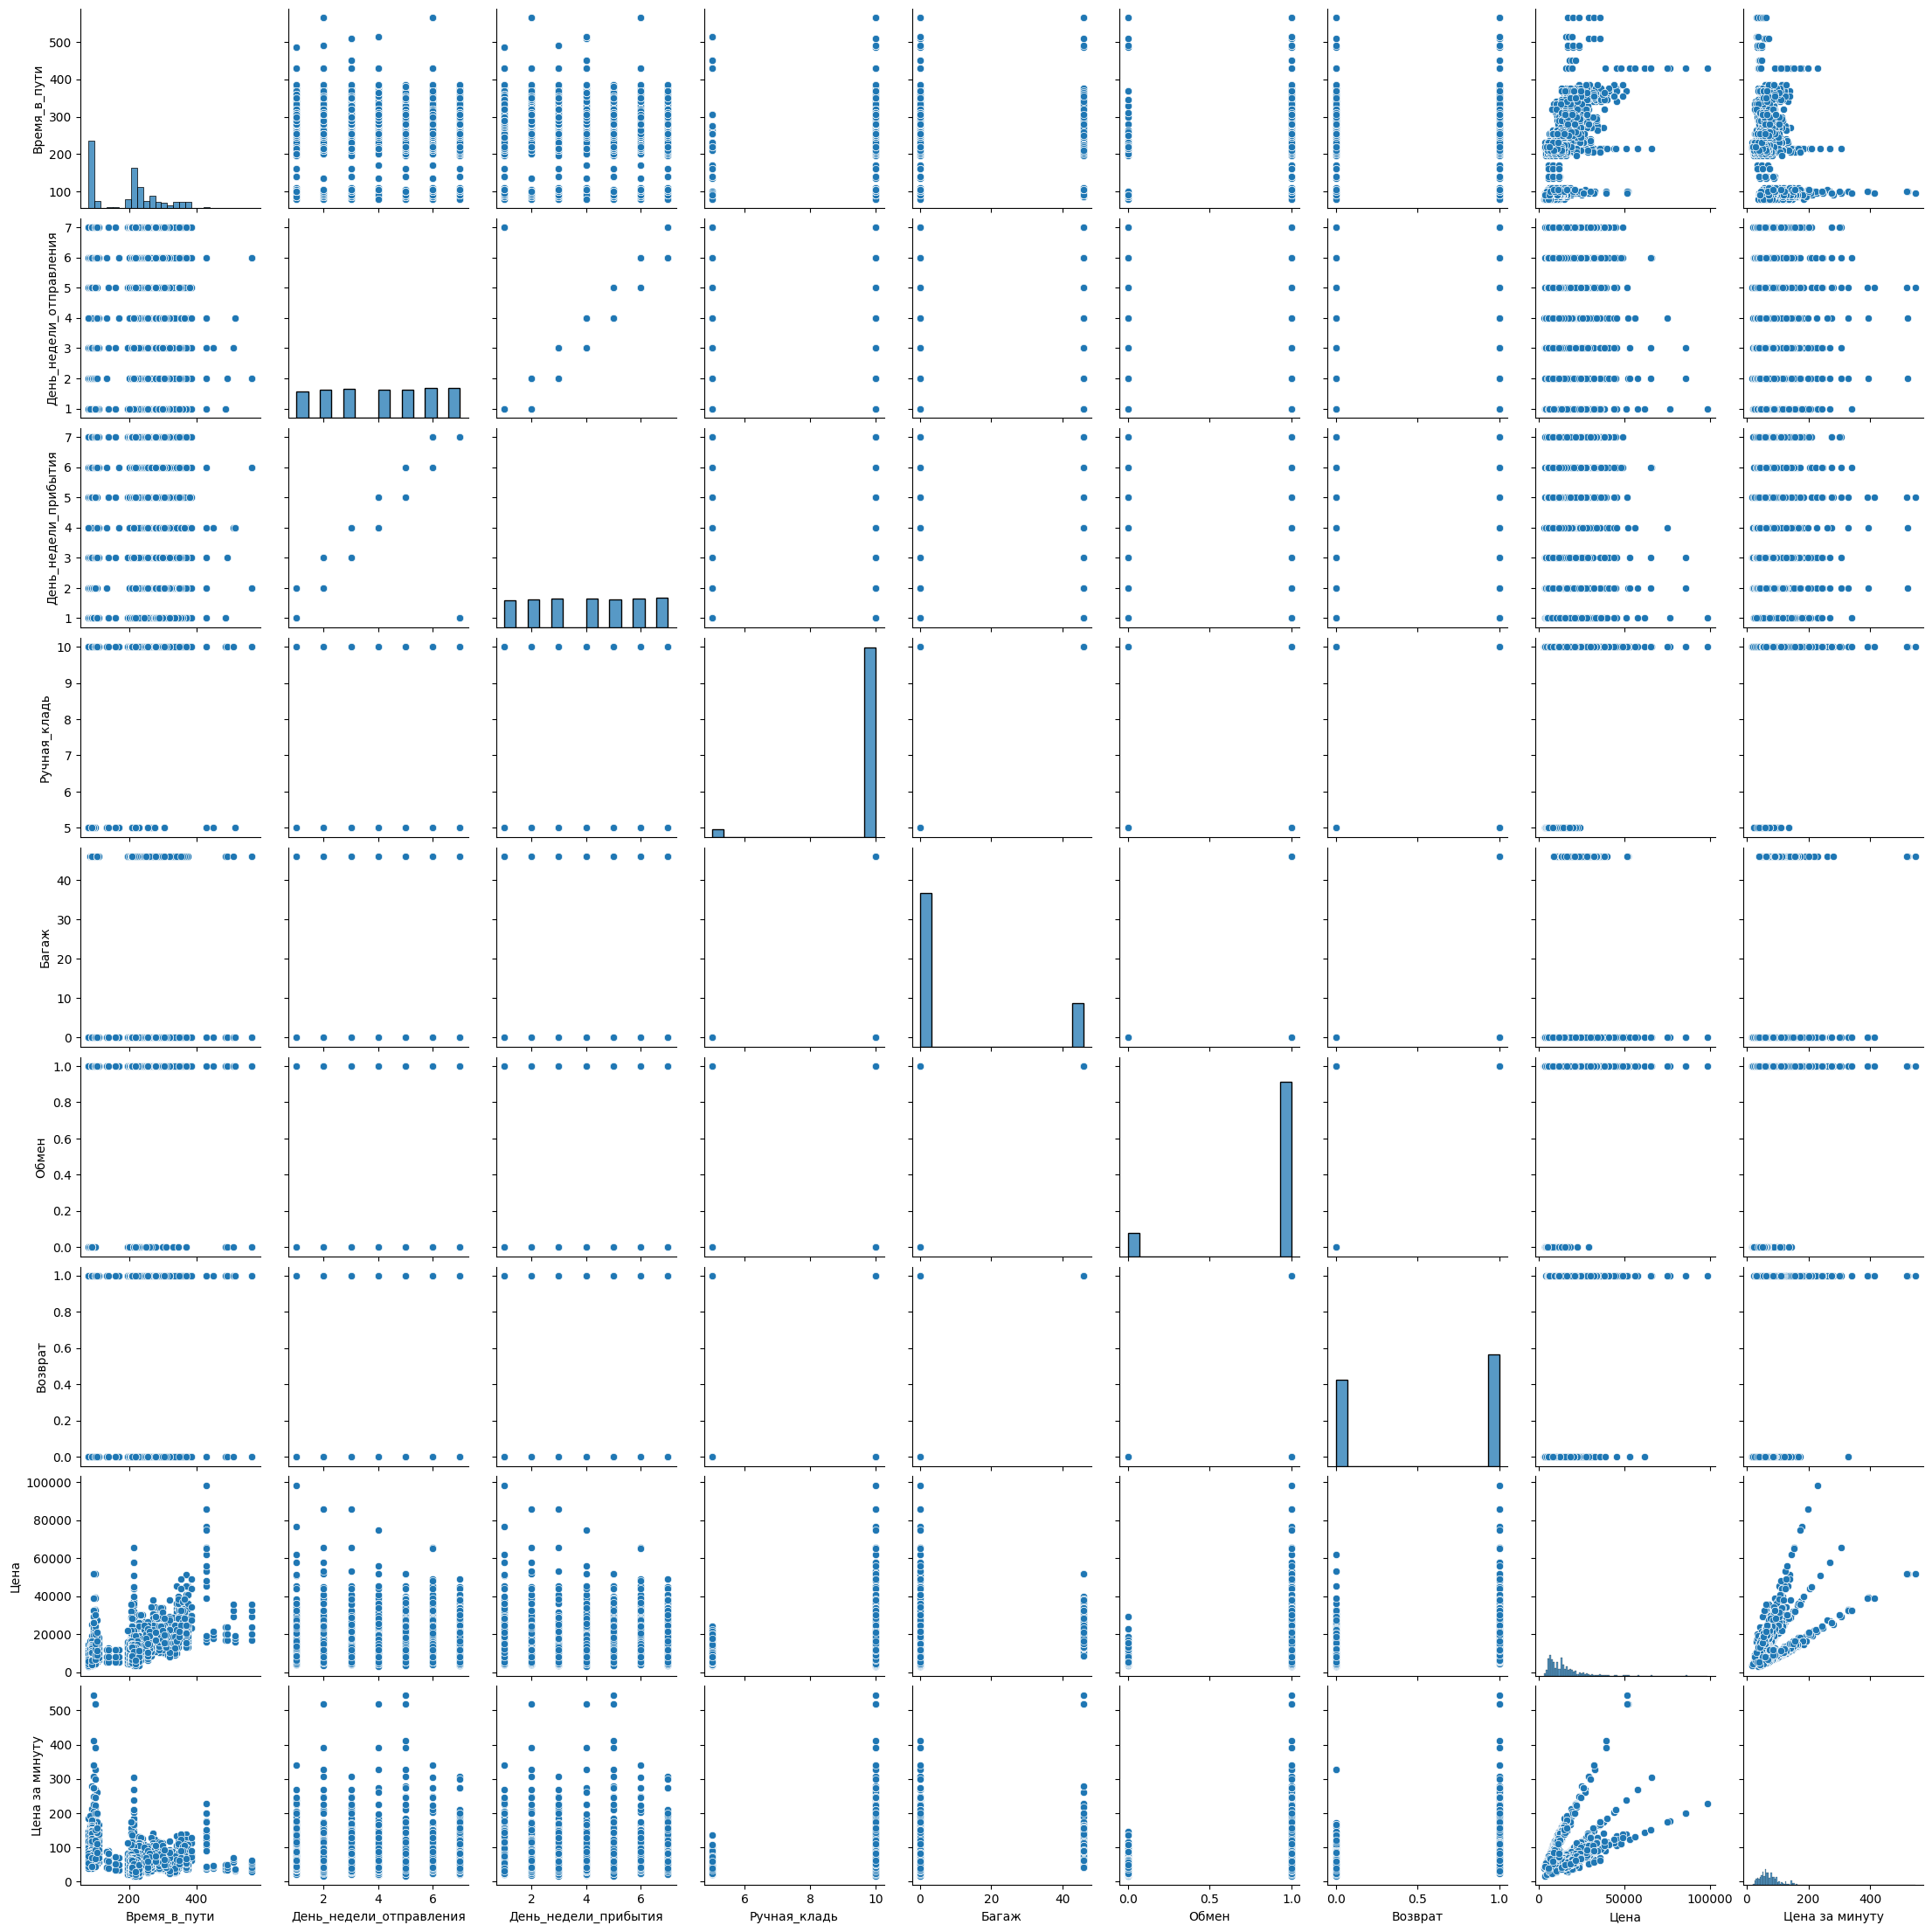

In [125]:
sns.pairplot(df)

In [126]:
df.shape

(5595, 19)

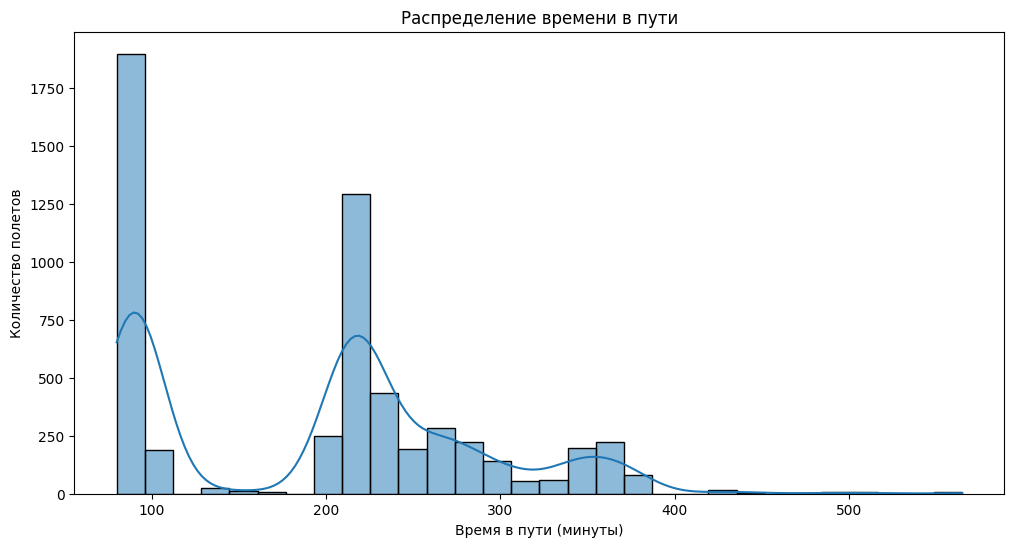

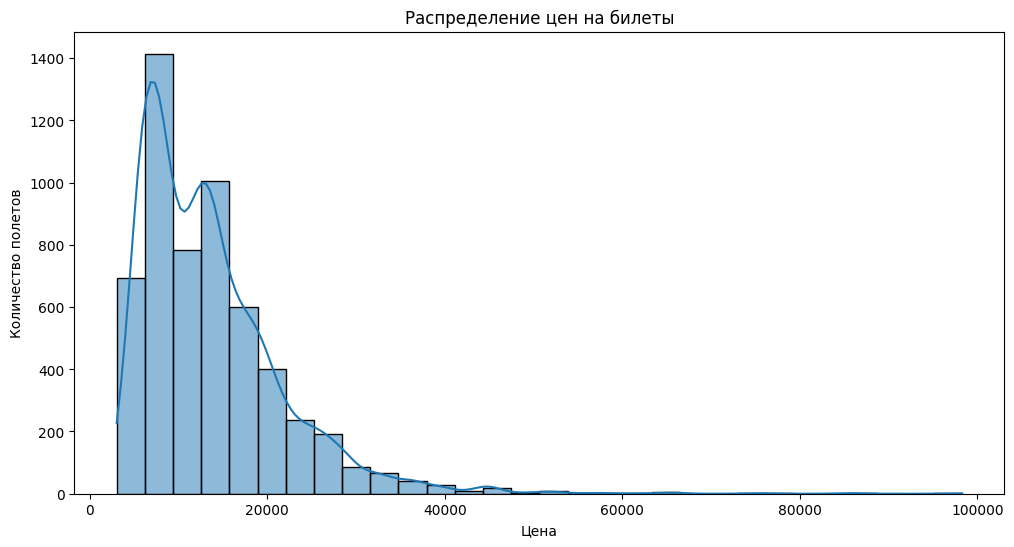

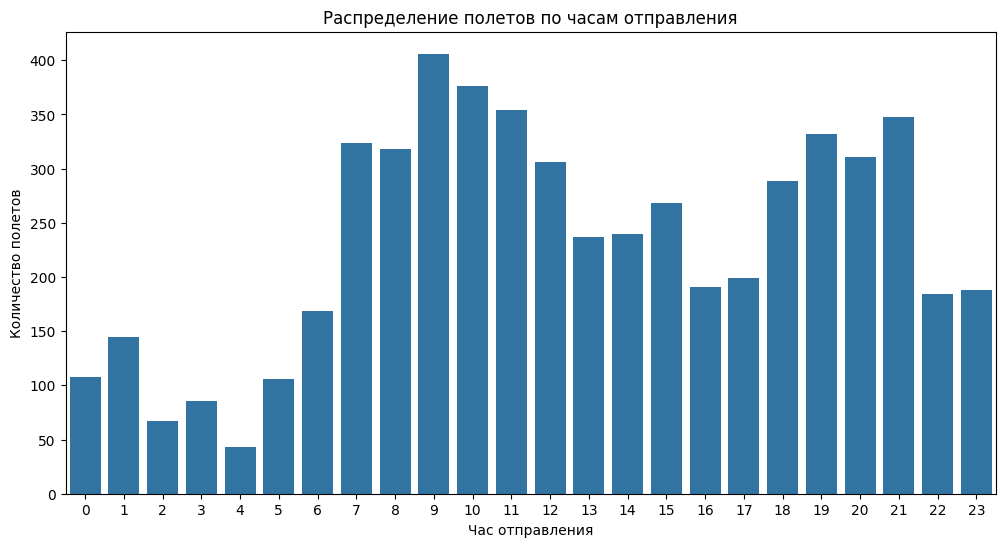

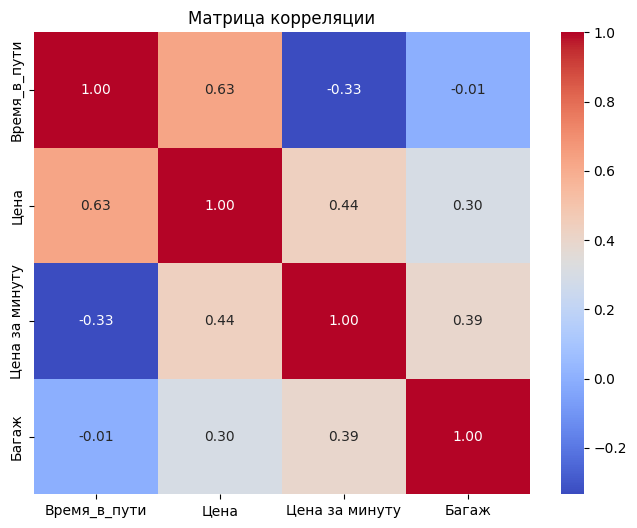

In [127]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Время_в_пути'], bins=30, kde=True)
plt.title('Распределение времени в пути')
plt.xlabel('Время в пути (минуты)')
plt.ylabel('Количество полетов')
plt.show()

# Распределение цен
plt.figure(figsize=(12, 6))
sns.histplot(df['Цена'], bins=30, kde=True)
plt.title('Распределение цен на билеты')
plt.xlabel('Цена')
plt.ylabel('Количество полетов')
plt.show()

# Время отправления
df['Время_отправления'] = pd.to_datetime(df['Время_отправления'])
df['Час_отправления'] = df['Время_отправления'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='Час_отправления', data=df)
plt.title('Распределение полетов по часам отправления')
plt.xlabel('Час отправления')
plt.ylabel('Количество полетов')
plt.show()

# Корреляция основных числовых переменных
correlation_matrix = df[['Время_в_пути', 'Цена', 'Цена за минуту', 'Багаж']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

**Распределение времени в пути:**

- Время в пути имеет несколько пиков, что может указывать на наличие типичных продолжительностей для определённых направлений. Особенно ярко выражены пики около 100 минут и более 200 минут.

**Распределение цен на билеты:**

- Распределение цен скошено вправо, что означает наличие немалого количества дорогих билетов по сравнению с более дешёвыми.  

- Большинство билетов сконцентрировано в более низком ценовом диапазоне.

**Распределение полетов по часам отправления:**

- Большинство полетов сконцентрировано в утренние и вечерние часы, с пиками около 7 утра и 8 вечера. Это типичное распределение, подчеркивающее предпочтения пассажиров вылетать утром или вечером.

**Матрица корреляции:**

Наблюдается положительная корреляция между временем в пути и ценой, что логично, так как более длительные полеты часто стоят дороже.

**Гипотезы для проверки:**

1. Цена зависит от времени отправления - проверить, есть ли значимые различия в ценах на билеты в зависимости от времени суток.

2. День недели влияет на цену билета - проверить, изменяется ли средняя цена билета в зависимости от дня недели.

3. Влияние авиакомпании на цену - исследовать, как различные авиакомпании устанавливают цены на билеты.

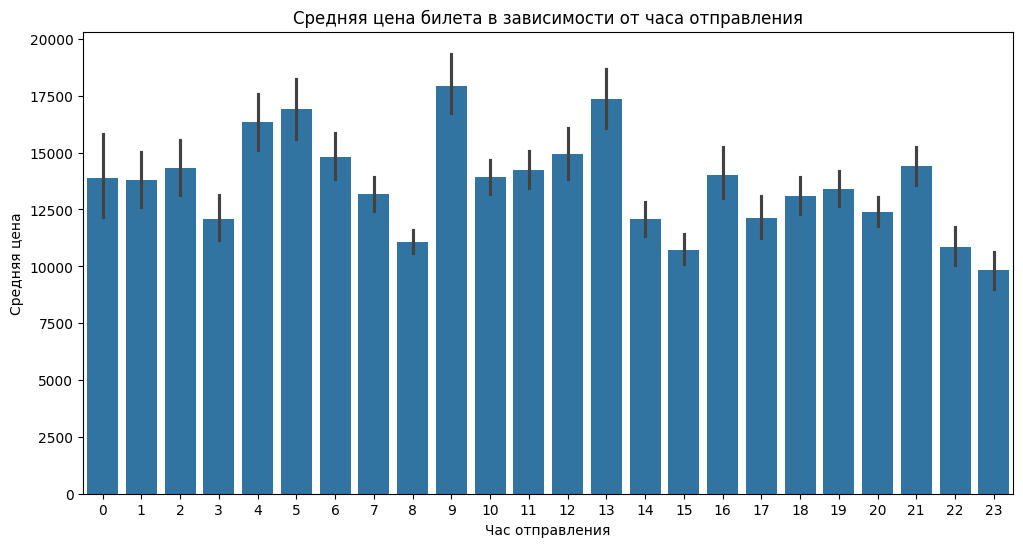

,sum_sq,df,F,PR(>F)
C(Час_отправления),2.390474e+10,23.0,16.987647,5.040580e-66
Residual,3.408444e+11,5571.0,NaN,NaN


In [128]:
hourly_price_mean = df.groupby('Час_отправления')['Цена'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Час_отправления', y='Цена', data=df)
plt.title('Средняя цена билета в зависимости от часа отправления')
plt.xlabel('Час отправления')
plt.ylabel('Средняя цена')
plt.show()

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Цена ~ C(Час_отправления)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


**Средняя цена билета в зависимости от часа отправления:**

График показывает, что существуют заметные колебания в средних ценах в зависимости от часа отправления. Например, билеты, отправляющиеся в ночные и ранние утренние часы, как правило, дешевле.

**ANOVA тест:**

Результаты ANOVA теста подтверждают, что есть статистически значимые различия в ценах на билеты в зависимости от часа отправления (p-значение $\approx 5.04\cdot 10 ^{-66}$), что чрезвычайно мало и позволяет отвергнуть нулевую гипотезу о том, что средние цены равны для всех групп времени отправления.

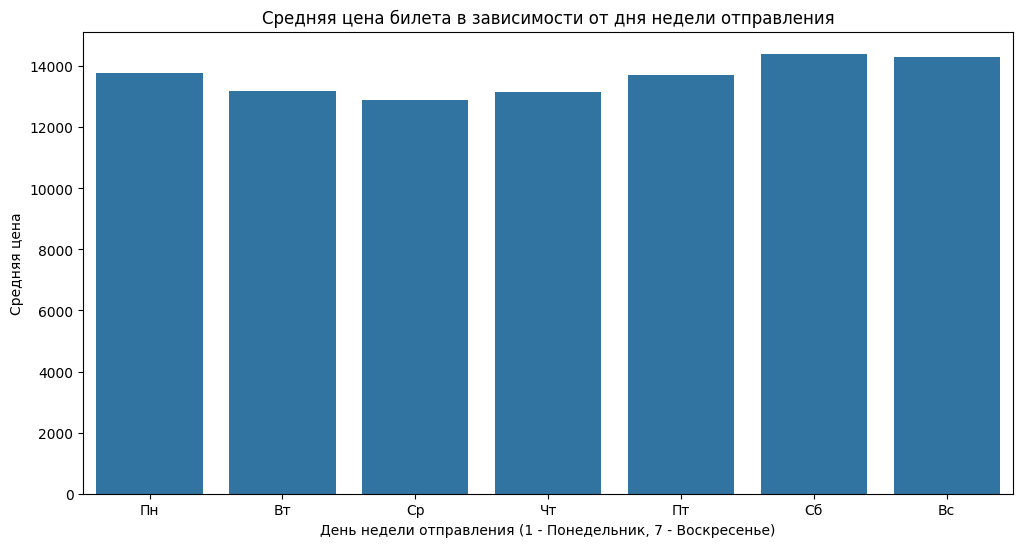

,sum_sq,df,F,PR(>F)
C(День_недели_отправления),1.675389e+09,6.0,4.2976,0.000249
Residual,3.630737e+11,5588.0,NaN,NaN


In [129]:
weekday_price_mean = df.groupby('День_недели_отправления')['Цена'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='День_недели_отправления', y='Цена', data=weekday_price_mean)
plt.title('Средняя цена билета в зависимости от дня недели отправления')
plt.xlabel('День недели отправления (1 - Понедельник, 7 - Воскресенье)')
plt.ylabel('Средняя цена')
plt.xticks(ticks=range(0, 7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

model_weekday = ols('Цена ~ C(День_недели_отправления)', data=df).fit()
anova_weekday_table = sm.stats.anova_lm(model_weekday, typ=2)
anova_weekday_table


**Средняя цена билета в зависимости от дня недели отправления:**

График показывает, что существуют различия в средней цене билетов в зависимости от дня недели. В частности, билеты в понедельник и воскресенье кажутся дороже, чем в остальные дни.

**ANOVA тест:**

Результаты ANOVA теста подтверждают наличие статистически значимых различий в средних ценах билетов по дням недели (p-значение $\approx 0.0000249$, что позволяет отвергнуть нулевую гипотезу о равенстве средних цен по всем дням.

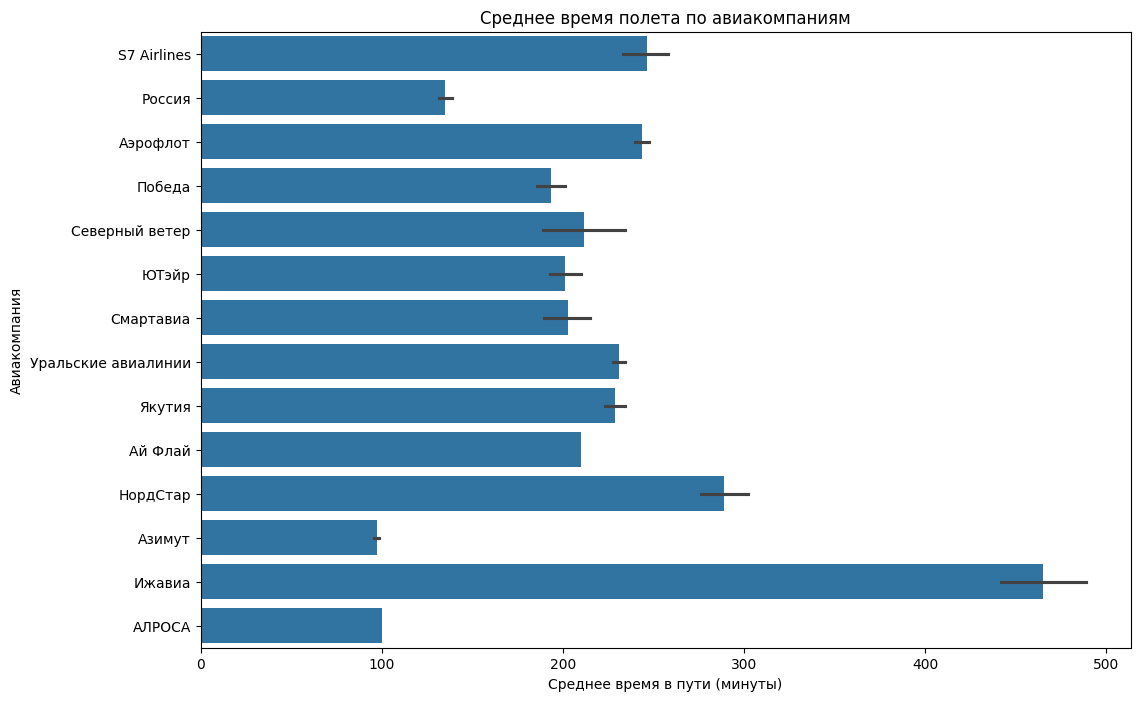

In [130]:
airline_flight_time_mean = df.groupby('Авиакомпания')['Время_в_пути'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Время_в_пути', y='Авиакомпания', data=df)
plt.title('Среднее время полета по авиакомпаниям')
plt.xlabel('Среднее время в пути (минуты)')
plt.ylabel('Авиакомпания')
plt.show()


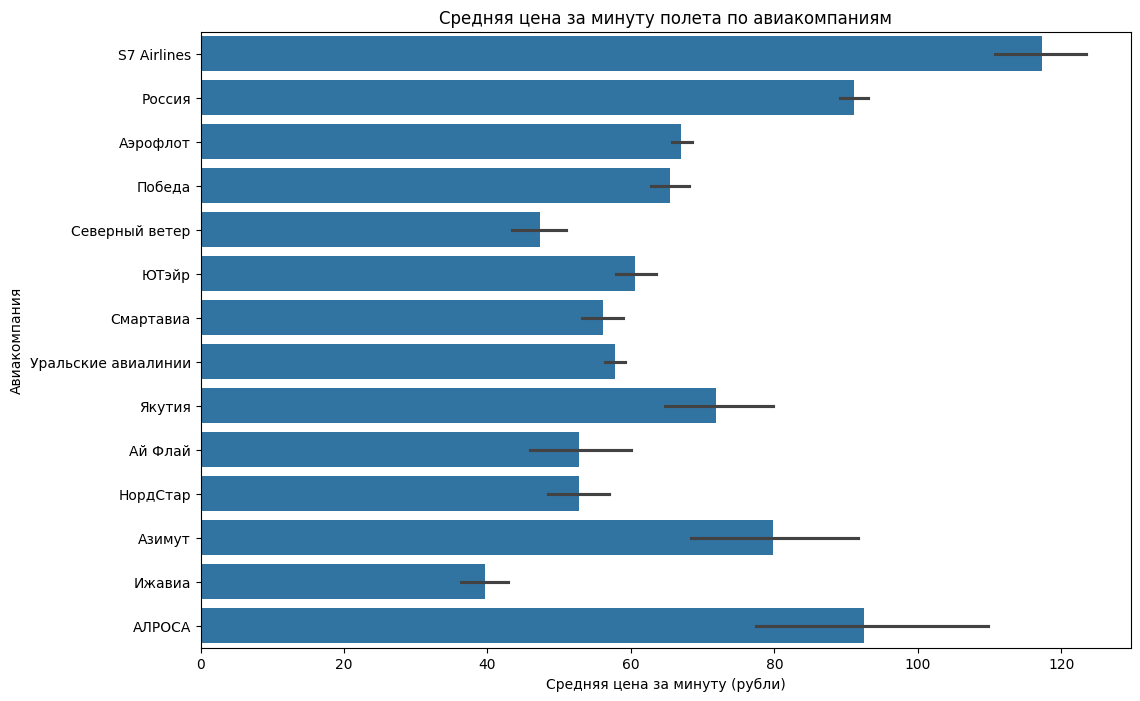

In [140]:
airline_price_per_minute_mean = df.groupby('Авиакомпания')['Цена за минуту'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Цена за минуту', y='Авиакомпания', data=df)
plt.title('Средняя цена за минуту полета по авиакомпаниям')
plt.xlabel('Средняя цена за минуту (рубли)')
plt.ylabel('Авиакомпания')
plt.show()


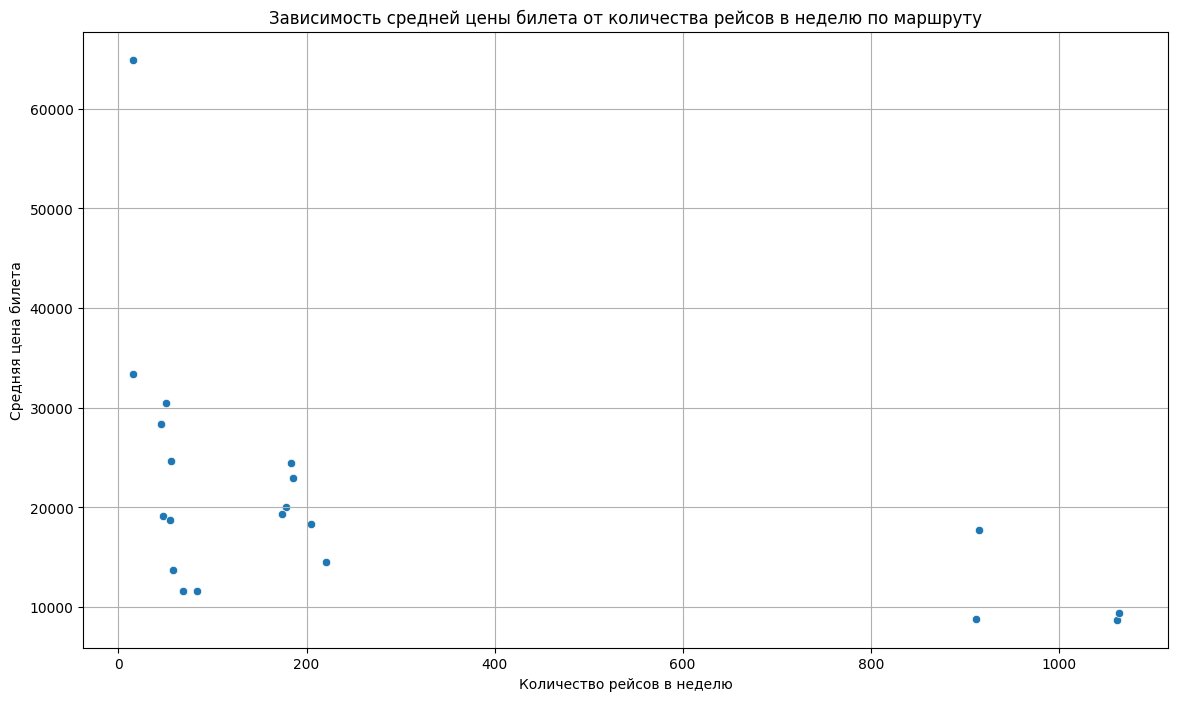

-0.4682857696672767

In [142]:
flights_per_week = df.groupby('Направление')['Дата_отправления'].count().reset_index()
flights_per_week.rename(columns={'Дата_отправления': 'Рейсы_в_неделю'}, inplace=True)

average_price_per_route = df.groupby('Направление')['Цена'].mean().reset_index()

route_analysis = pd.merge(flights_per_week, average_price_per_route, on='Направление')

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Рейсы_в_неделю', y='Цена', data=route_analysis)
plt.title('Зависимость средней цены билета от количества рейсов в неделю по маршруту')
plt.xlabel('Количество рейсов в неделю')
plt.ylabel('Средняя цена билета')
plt.grid(True)
plt.show()

correlation = route_analysis['Рейсы_в_неделю'].corr(route_analysis['Цена'])
correlation


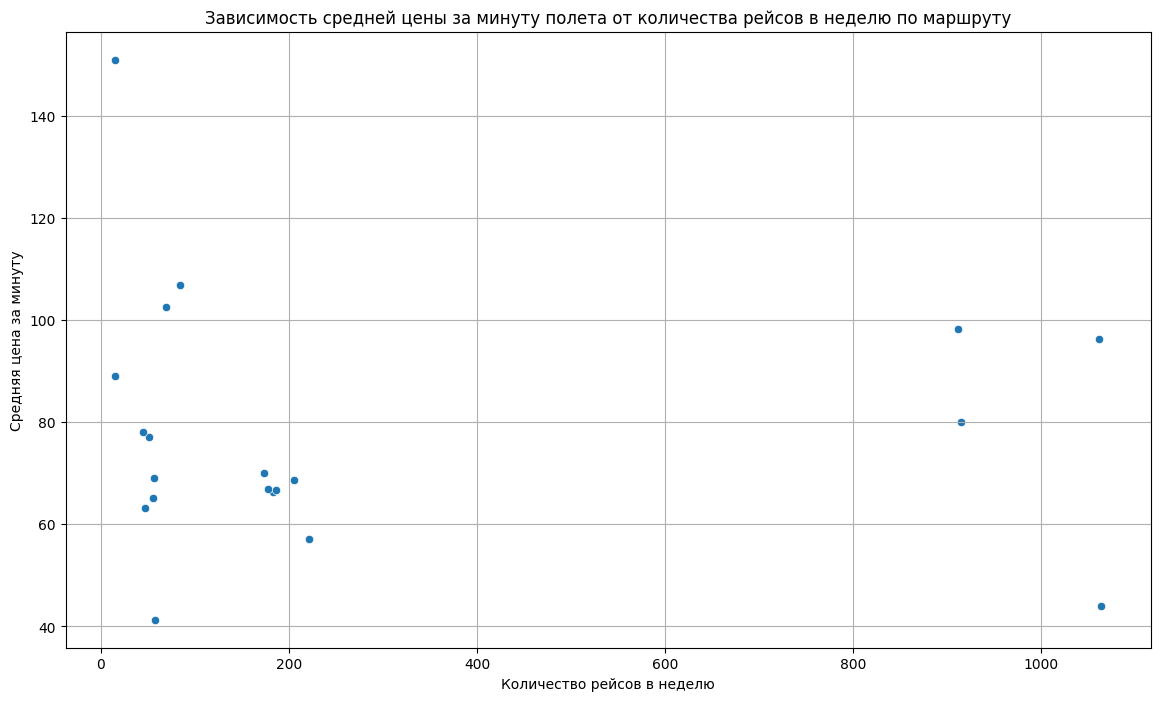

-0.05035475676759509

In [141]:

average_price_per_minute_per_route = df.groupby('Направление')['Цена за минуту'].mean().reset_index()


route_price_per_minute_analysis = pd.merge(flights_per_week, average_price_per_minute_per_route, on='Направление')


plt.figure(figsize=(14, 8))
sns.scatterplot(x='Рейсы_в_неделю', y='Цена за минуту', data=route_price_per_minute_analysis)
plt.title('Зависимость средней цены за минуту полета от количества рейсов в неделю по маршруту')
plt.xlabel('Количество рейсов в неделю')
plt.ylabel('Средняя цена за минуту')
plt.grid(True)
plt.show()


correlation_price_per_minute = route_price_per_minute_analysis['Рейсы_в_неделю'].corr(route_price_per_minute_analysis['Цена за минуту'])
correlation_price_per_minute


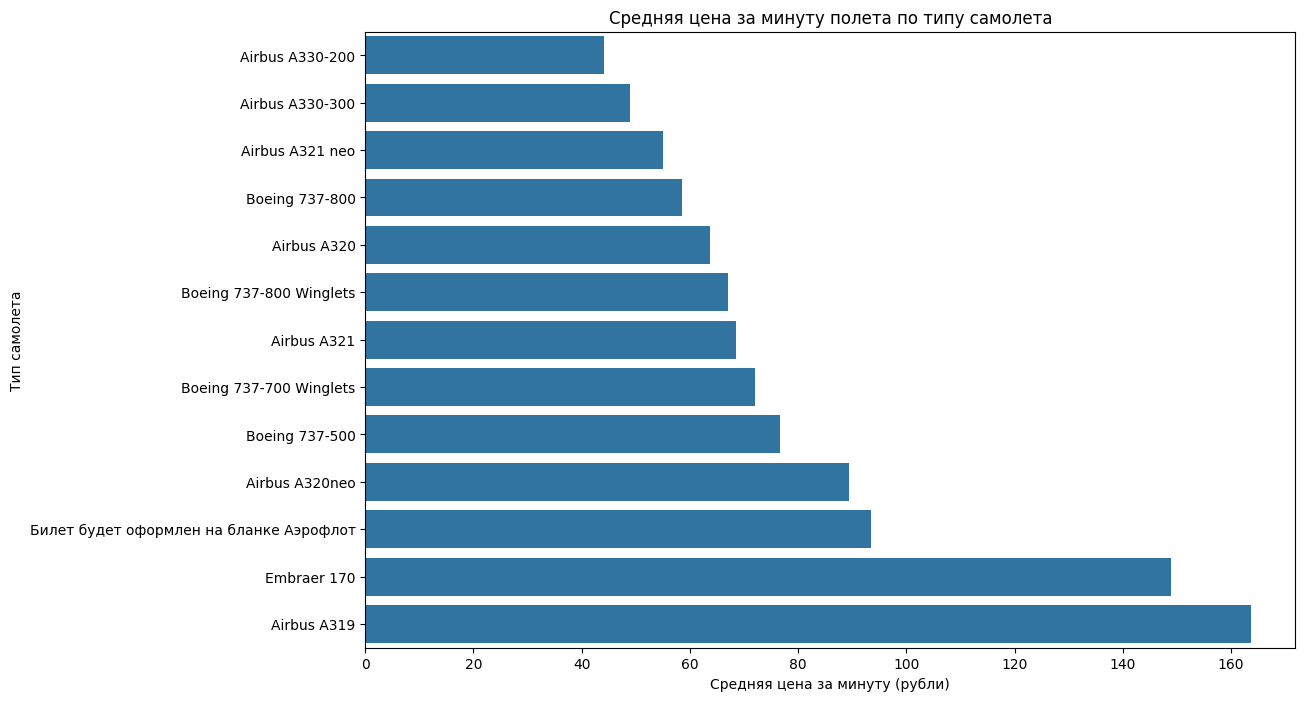

In [134]:

average_price_per_minute_per_plane = df.groupby('Самолет')['Цена за минуту'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Цена за минуту', y='Самолет', data=average_price_per_minute_per_plane)
plt.title('Средняя цена за минуту полета по типу самолета')
plt.xlabel('Средняя цена за минуту (рубли)')
plt.ylabel('Тип самолета')
plt.show()


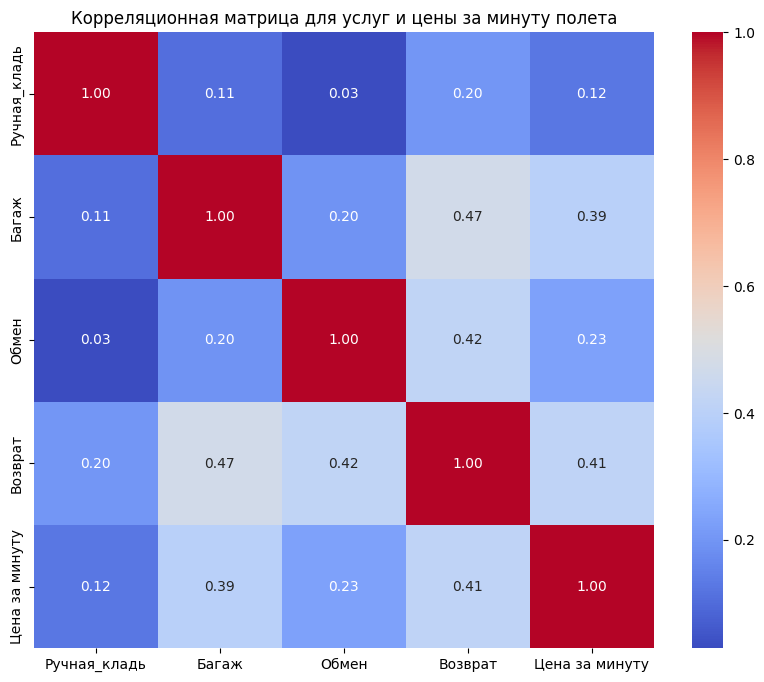

In [135]:

features_per_minute = ['Ручная_кладь', 'Багаж', 'Обмен', 'Возврат', 'Цена за минуту']

correlation_matrix_services_per_minute = df[features_per_minute].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_services_per_minute, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица для услуг и цены за минуту полета')
plt.show()


/var/folders/xp/hfqkwdyd7cl_l63v11g_d6680000gn/T/ipykernel_25091/876305519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Время_в_пути', y='Авиакомпания', data=df, palette=custom_palette, fill=False)
/var/folders/xp/hfqkwdyd7cl_l63v11g_d6680000gn/T/ipykernel_25091/876305519.py:3: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='Время_в_пути', y='Авиакомпания', data=df, palette=custom_palette, fill=False)


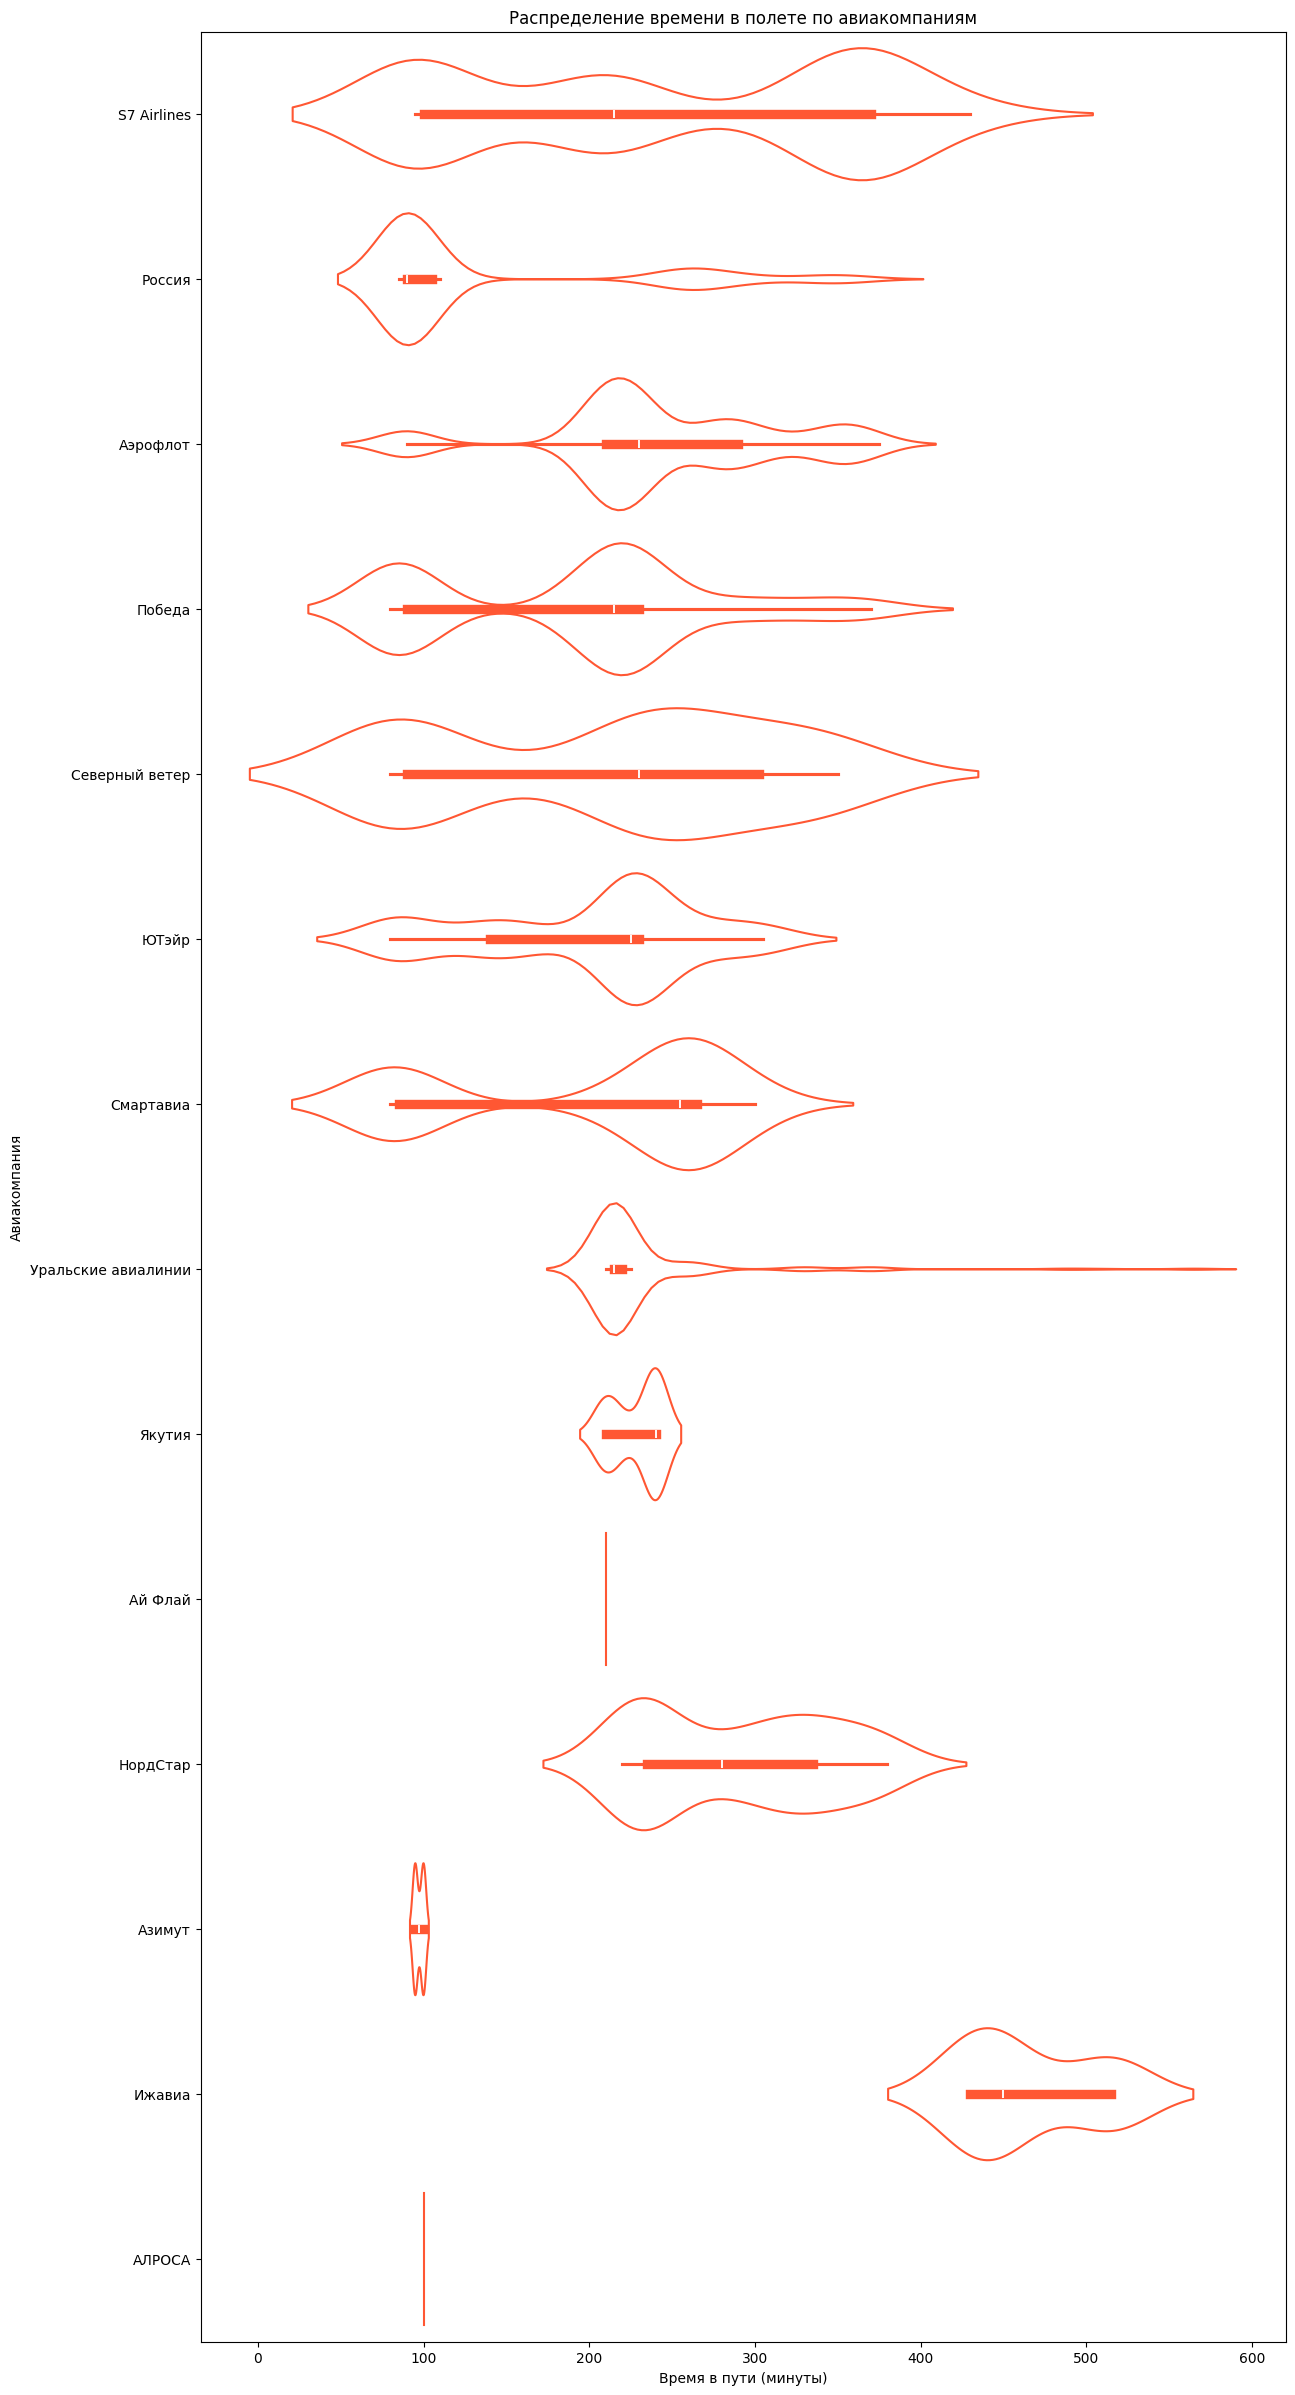

In [136]:
custom_palette = ["#FF5733"]
plt.figure(figsize=(14, 30))
sns.violinplot(x='Время_в_пути', y='Авиакомпания', data=df, palette=custom_palette, fill=False)
plt.title('Распределение времени в полете по авиакомпаниям')
plt.xlabel('Время в пути (минуты)')
plt.ylabel('Авиакомпания')
plt.show()


/Users/polzovatel/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/polzovatel/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/polzovatel/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


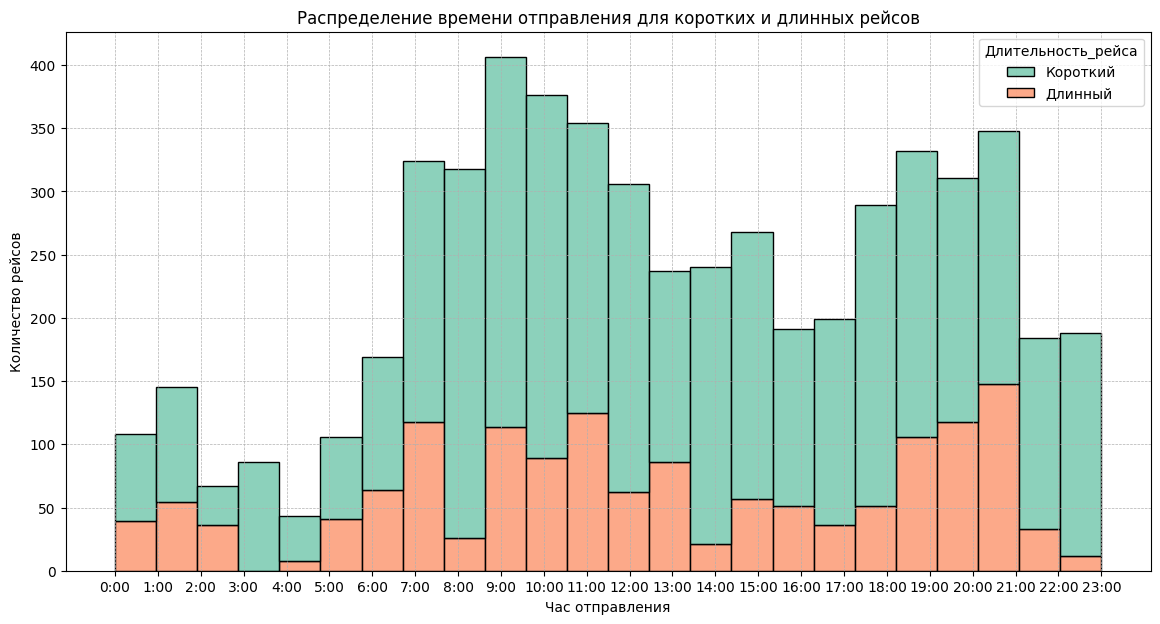

In [137]:

df['Длительность_рейса'] = pd.cut(df['Время_в_пути'], bins=[0, 240, max(df['Время_в_пути'])], labels=['Короткий', 'Длинный'])


df['Час_отправления'] = df['Время_отправления'].dt.hour


plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='Час_отправления', hue='Длительность_рейса', multiple='stack', bins=24, palette='Set2')
plt.title('Распределение времени отправления для коротких и длинных рейсов')
plt.xlabel('Час отправления')
plt.ylabel('Количество рейсов')
plt.xticks(ticks=range(0, 24), labels=[f"{hour}:00" for hour in range(0, 24)])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


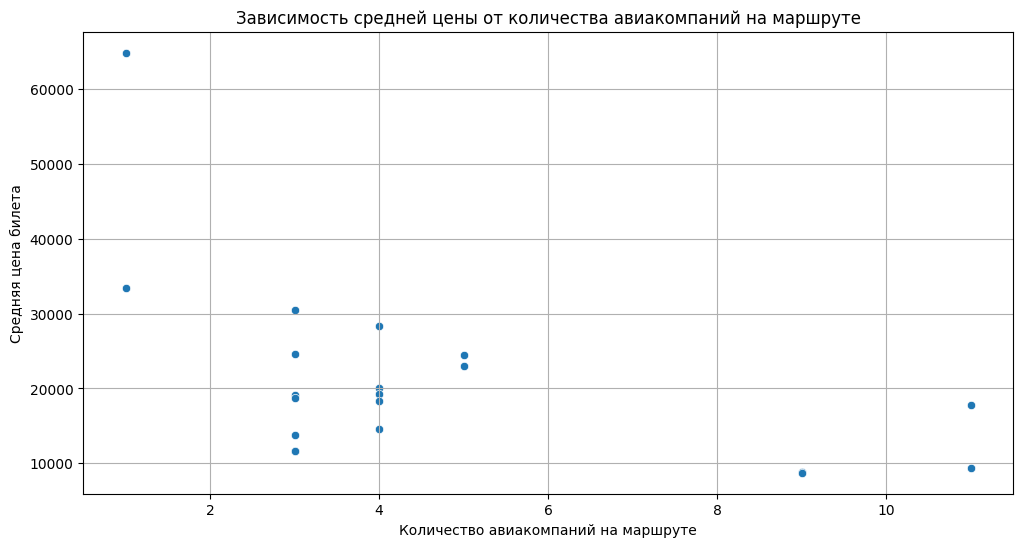

-0.5291523228551738

In [138]:
companies_per_route = df.groupby('Направление')['Авиакомпания'].nunique().reset_index().rename(columns={'Авиакомпания': 'Количество_авиакомпаний'})

average_metrics_per_route = df.groupby('Направление').agg({
    'Цена': 'mean',
    'Ручная_кладь': 'mean',
    'Багаж': 'mean',
    'Обмен': 'mean',
    'Возврат': 'mean'
}).reset_index().rename(columns={'Цена': 'Средняя_цена'})


route_competition_analysis = pd.merge(companies_per_route, average_metrics_per_route, on='Направление')


plt.figure(figsize=(12, 6))
sns.scatterplot(data=route_competition_analysis, x='Количество_авиакомпаний', y='Средняя_цена')
plt.title('Зависимость средней цены от количества авиакомпаний на маршруте')
plt.xlabel('Количество авиакомпаний на маршруте')
plt.ylabel('Средняя цена билета')
plt.grid(True)
plt.show()


correlation_price_companies = route_competition_analysis['Количество_авиакомпаний'].corr(route_competition_analysis['Средняя_цена'])
correlation_price_companies


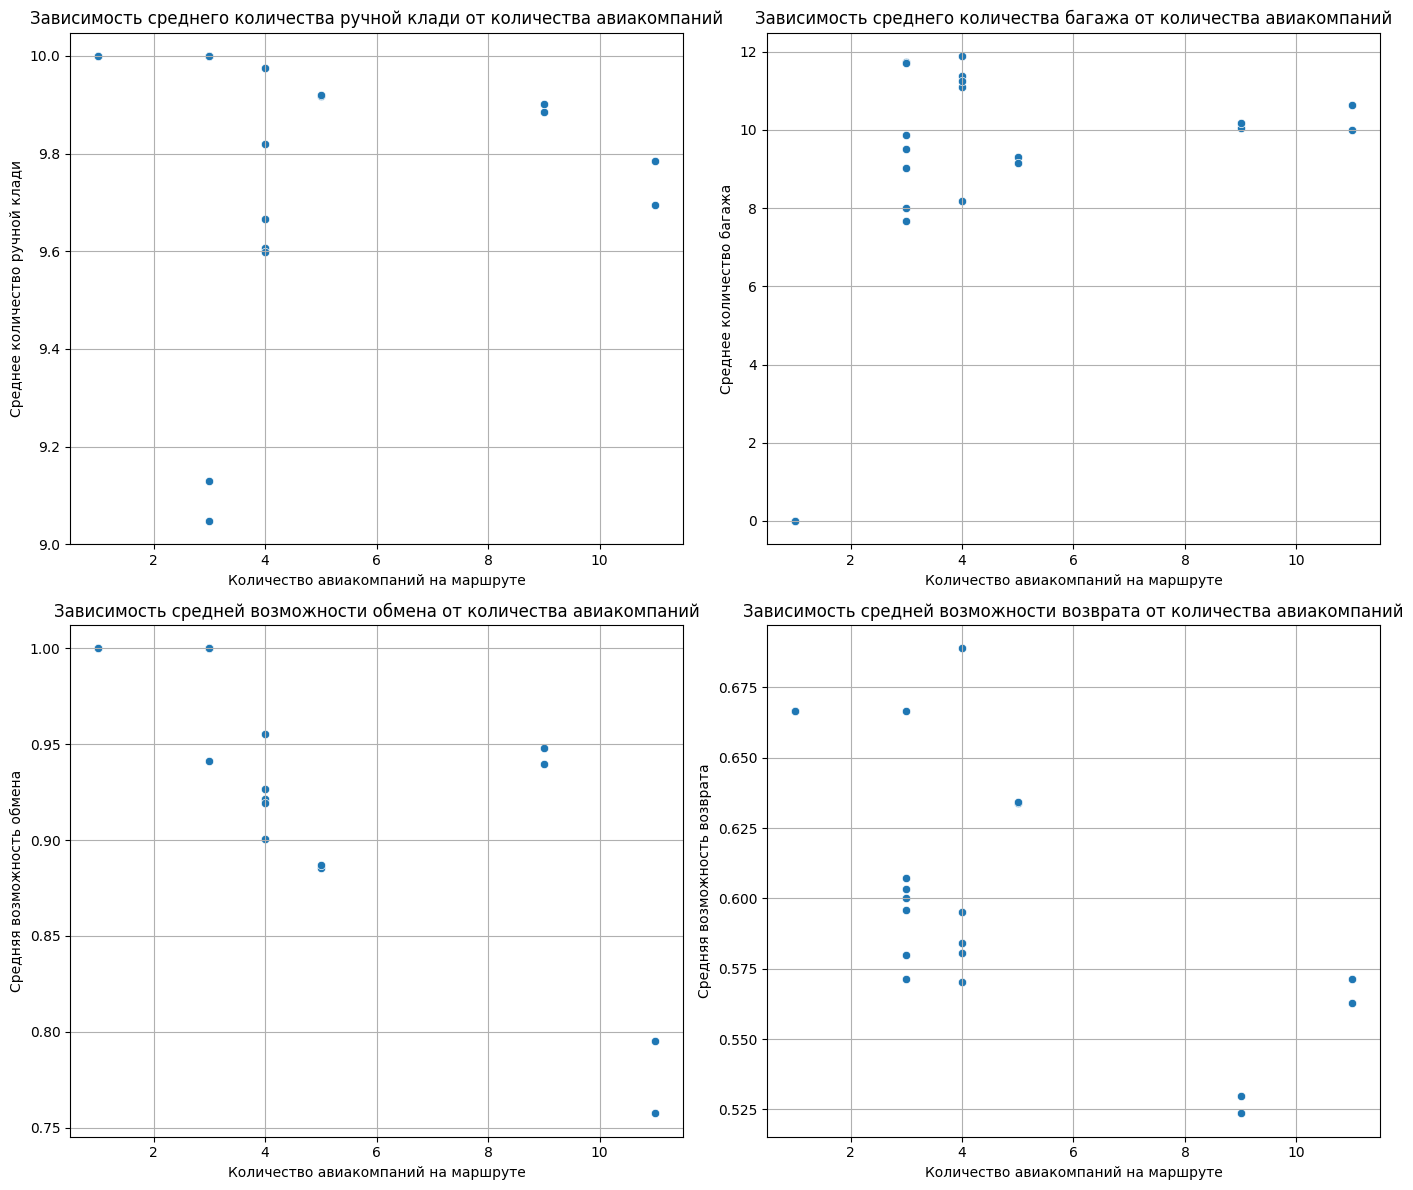

Ручная_кладь   -0.027411
Багаж           0.421959
Обмен          -0.784757
Возврат        -0.613556
Name: Количество_авиакомпаний, dtype: float64

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Ручная кладь
sns.scatterplot(data=route_competition_analysis, x='Количество_авиакомпаний', y='Ручная_кладь', ax=axs[0, 0])
axs[0, 0].set_title('Зависимость среднего количества ручной клади от количества авиакомпаний')
axs[0, 0].set_xlabel('Количество авиакомпаний на маршруте')
axs[0, 0].set_ylabel('Среднее количество ручной клади')
axs[0, 0].grid(True)

# Багаж
sns.scatterplot(data=route_competition_analysis, x='Количество_авиакомпаний', y='Багаж', ax=axs[0, 1])
axs[0, 1].set_title('Зависимость среднего количества багажа от количества авиакомпаний')
axs[0, 1].set_xlabel('Количество авиакомпаний на маршруте')
axs[0, 1].set_ylabel('Среднее количество багажа')
axs[0, 1].grid(True)

# Обмен
sns.scatterplot(data=route_competition_analysis, x='Количество_авиакомпаний', y='Обмен', ax=axs[1, 0])
axs[1, 0].set_title('Зависимость средней возможности обмена от количества авиакомпаний')
axs[1, 0].set_xlabel('Количество авиакомпаний на маршруте')
axs[1, 0].set_ylabel('Средняя возможность обмена')
axs[1, 0].grid(True)

# Возврат
sns.scatterplot(data=route_competition_analysis, x='Количество_авиакомпаний', y='Возврат', ax=axs[1, 1])
axs[1, 1].set_title('Зависимость средней возможности возврата от количества авиакомпаний')
axs[1, 1].set_xlabel('Количество авиакомпаний на маршруте')
axs[1, 1].set_ylabel('Средняя возможность возврата')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

correlations_services = route_competition_analysis[['Количество_авиакомпаний', 'Ручная_кладь', 'Багаж', 'Обмен', 'Возврат']].corr()['Количество_авиакомпаний'].drop('Количество_авиакомпаний')
correlations_services


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Выбор переменных
features = ['Время_в_пути', 'День_недели_отправления', 'Авиакомпания', 'Самолет', 'Багаж', 'Обмен', 'Возврат', 'Ручная_кладь']
target = 'Цена'

# Подготовка данных: кодирование категориальных переменных и разделение данных
X = df[features]
y = df[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обработка категориальных переменных
categorical_features = ['День_недели_отправления', 'Авиакомпания', 'Самолет']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Создание трансформера колонок
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

# Создание конвейера
regressor = LinearRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', regressor)])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = pipeline.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(21259586.508679837, 0.706019089430728)